In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from urllib import parse
from urllib import robotparser
import numpy as np
import pandas as pd

In [2]:
url = 'https://www.worldometers.info/coronavirus/'

In [3]:
URL_BASE = url
parser = robotparser.RobotFileParser()
parser.set_url(parse.urljoin(URL_BASE, 'robots.txt'))
parser.read()
print(url,'check = ', parser.can_fetch('*', url))

https://www.worldometers.info/coronavirus/ check =  False


## éo cho thu thập :((

In [4]:
html_text = requests.get(url).text

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 138,123,821 Cases and 2,974,946 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<lin
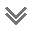

In [5]:
html_text

In [6]:
tree = BeautifulSoup(html_text, "html.parser")

In [7]:
cols = tree.find('thead').find_all('th')

In [8]:
len(cols)

19

In [9]:
columns = []
for col in cols:
    columns.append(col.text)

In [10]:
lines = tree.find('tbody').find_all('tr',{'style':''})

In [11]:
data = []

for line in lines:
    row = []
    for l in line.find_all('td'):
        row.append(l.text)
    data.append(row)

In [12]:
df = pd.DataFrame(np.array(data), columns=columns)

In [13]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,,World,"138,123,821","+116,790","2,974,946","+3,658","111,133,601","+98,801","24,015,274","106,032","17,720",381.7,,,,All,\n,,
1,1,USA,"32,070,784",,"577,179",,"24,626,410",,"6,867,195","9,505","96,447","1,736","422,126,761","1,269,472","332,521,463",North America,10,576,1
2,2,India,"13,873,825","+2,504","172,115",,"12,336,036","+3,348","1,365,674","8,944","9,977",124,"260,618,866","187,414","1,390,605,073",Asia,100,"8,080",5
3,3,Brazil,"13,601,566",,"358,718",,"12,074,798",,"1,168,050","8,318","63,636","1,678","28,600,000","133,807","213,741,192",South America,16,596,7
4,4,France,"5,106,329",,"99,480",,"313,051",,"4,693,798","5,952","78,094","1,521","70,448,755","1,077,418","65,386,679",Europe,13,657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,214,Solomon Islands,19,,,,18,,1,,27,,"4,500","6,429","699,965",Australia/Oceania,"36,840",,156
208,215,Western Sahara,10,,1,,8,,1,,16,2,,,"608,744",Africa,"60,874","608,744",
209,218,Samoa,3,,,,2,,1,,15,,,,"199,445",Australia/Oceania,"66,482",,
210,219,Vanuatu,3,,,,1,,2,,10,,470,"1,503","312,721",Australia/Oceania,"104,240",,665


In [14]:
from datetime import date
today = date.today()

In [15]:
df.to_csv('%s.csv'% str(today))